<a href="https://colab.research.google.com/github/SeidaAhmed/Fitness-Analytics-through-Data-Mining-Leveraging-Wearable-Device-Data-/blob/main/CIND840_Advanced_Dataanalytics_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
%cd drive/My Drive/

/content/drive/My Drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



In [ ]:

df = pd.read_csv('gym_members_exercise_tracking.csv')
# Display first few rows
df.head()



Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [ ]:
# Check data types and missing values
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:


# Summary statistics
print(df.describe())

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

In [ ]:
# Standardize categorical values
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Workout_Type'] = df['Workout_Type'].str.capitalize().str.strip()

# Check unique values
print(df['Gender'].unique())
print(df['Workout_Type'].unique())

['male' 'female']
['Yoga' 'Hiit' 'Cardio' 'Strength']


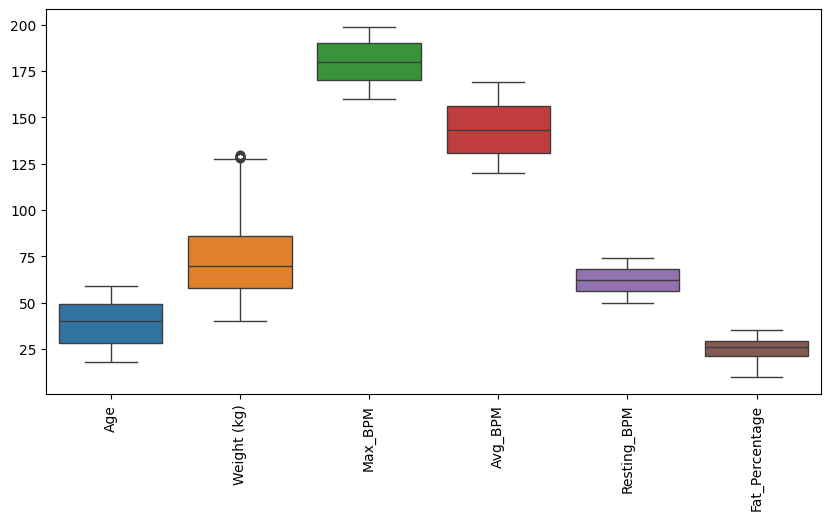

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM',
                     'Resting_BPM',
                     'Fat_Percentage']])
plt.xticks(rotation=90)
plt.show()




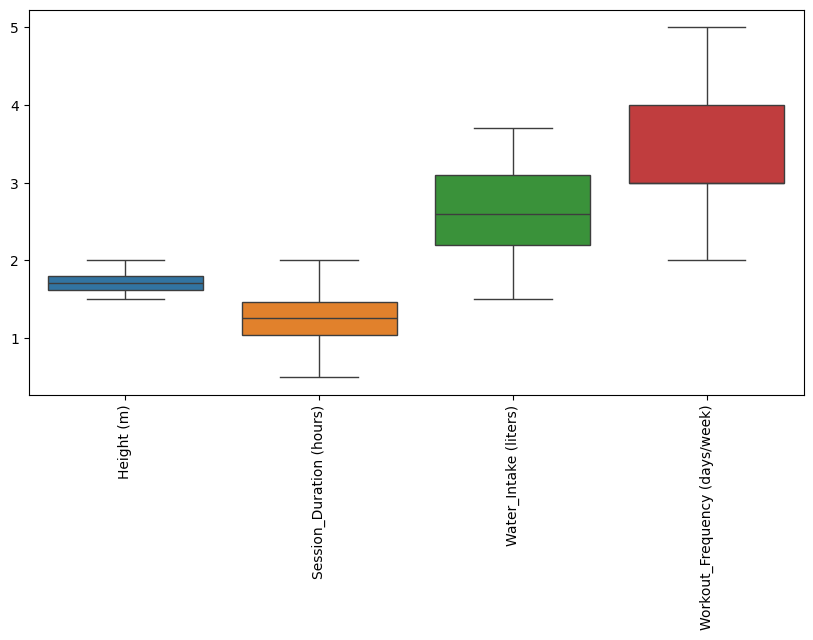

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Height (m)',
                      'Session_Duration (hours)',
                     'Water_Intake (liters)', 'Workout_Frequency (days/week)']])
plt.xticks(rotation=90)
plt.show()


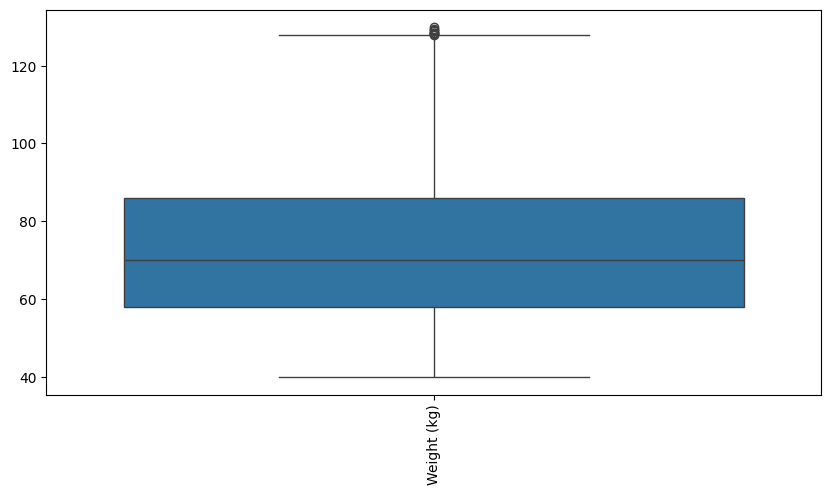

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Weight (kg)']])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Convert categorical variables
df['Gender'] = df['Gender'].astype('category')
df['Workout_Type'] = df['Workout_Type'].astype('category')
df['Experience_Level'] = df['Experience_Level'].astype('category')

# Convert duration to float if necessary
df['Session_Duration (hours)'] = df['Session_Duration (hours)'].astype(float)


In [ ]:
# Categorize Age Groups
df['Age Group'] = pd.cut(df['Age'], bins=[10, 18, 30, 45, 60, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Middle-aged', 'Senior'])


In [ ]:
 #General statistics
print(df.describe(include='all'))

               Age Gender  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count   973.000000    973   973.000000   973.00000  973.000000  973.000000   
unique         NaN      2          NaN         NaN         NaN         NaN   
top            NaN   male          NaN         NaN         NaN         NaN   
freq           NaN    511          NaN         NaN         NaN         NaN   
mean     38.683453    NaN    73.854676     1.72258  179.883864  143.766701   
std      12.180928    NaN    21.207500     0.12772   11.525686   14.345101   
min      18.000000    NaN    40.000000     1.50000  160.000000  120.000000   
25%      28.000000    NaN    58.100000     1.62000  170.000000  131.000000   
50%      40.000000    NaN    70.000000     1.71000  180.000000  143.000000   
75%      49.000000    NaN    86.000000     1.80000  190.000000  156.000000   
max      59.000000    NaN   129.900000     2.00000  199.000000  169.000000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned 

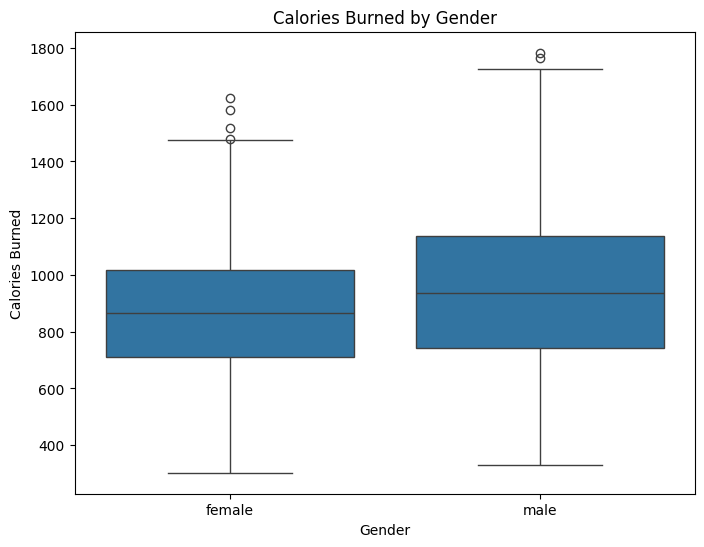

In [ ]:
# Boxplot of Calories_Burned by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories_Burned', data=df)
plt.title('Calories Burned by Gender')
plt.ylabel('Calories Burned')
plt.xlabel('Gender')
plt.show()

From the boxplot, we observe that males tend to have a higher median calories burned compared to females. The spread of calorie values is also slightly wider among males, indicating greater variability. Both genders have some outliers, but they are more extreme in the male group."

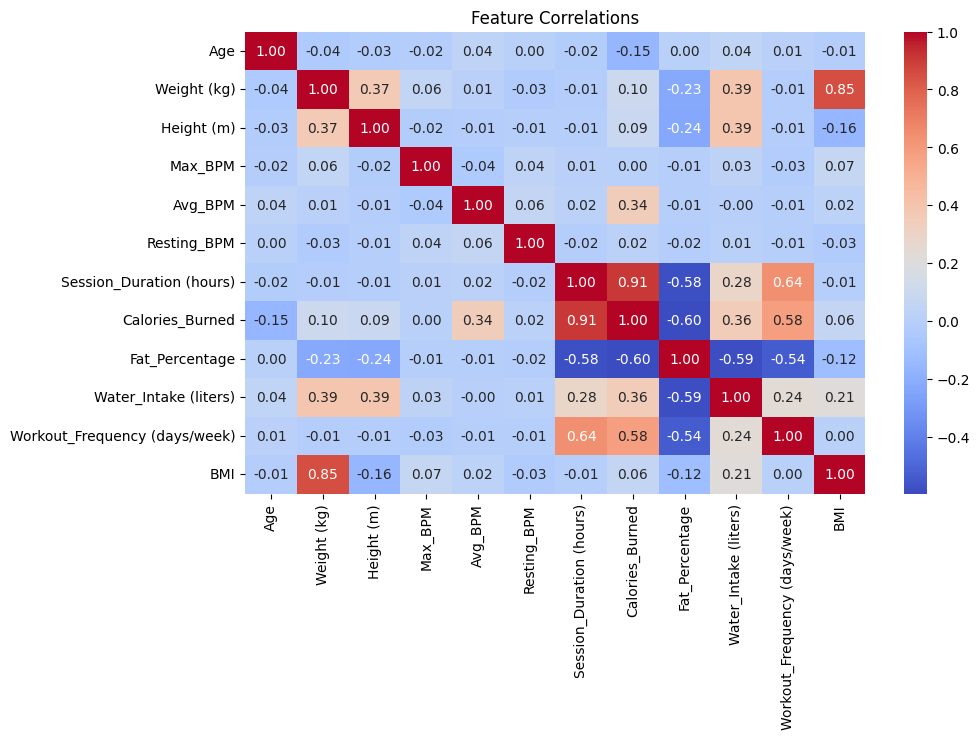

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [ ]:
df.to_csv("cleaned_gym_dataset.csv", index=False)

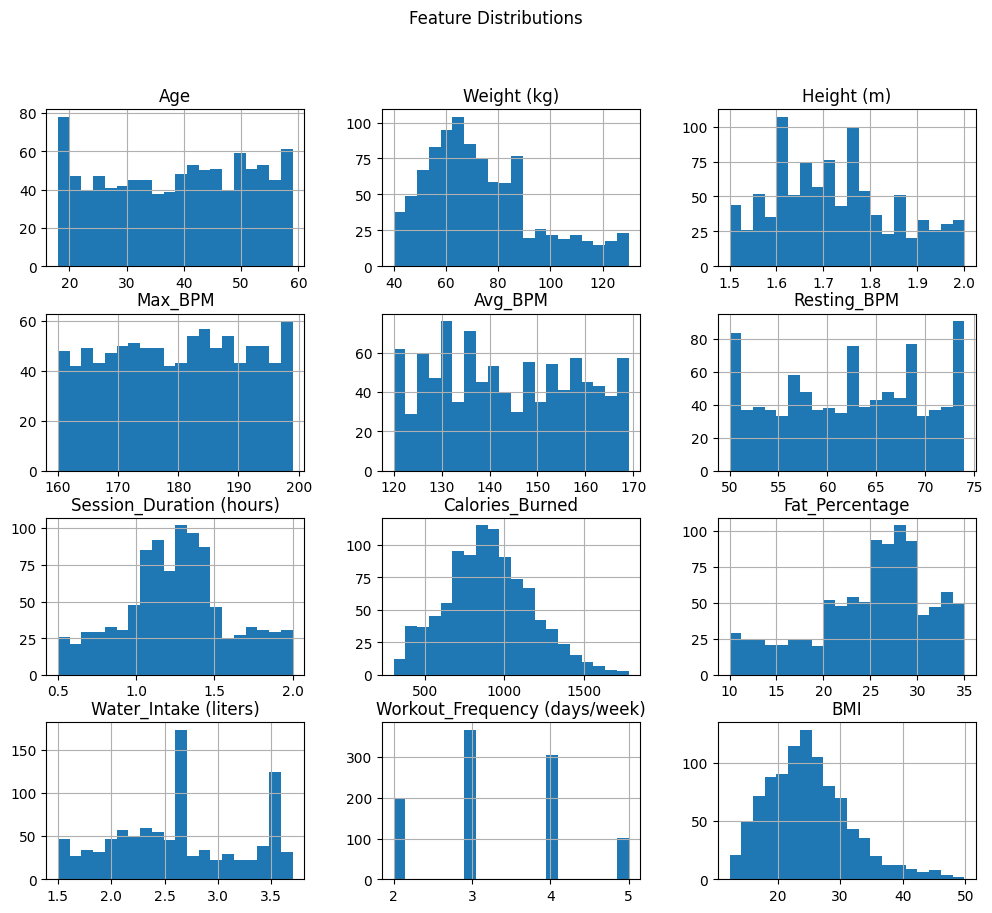

In [ ]:
# Data distribution of numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

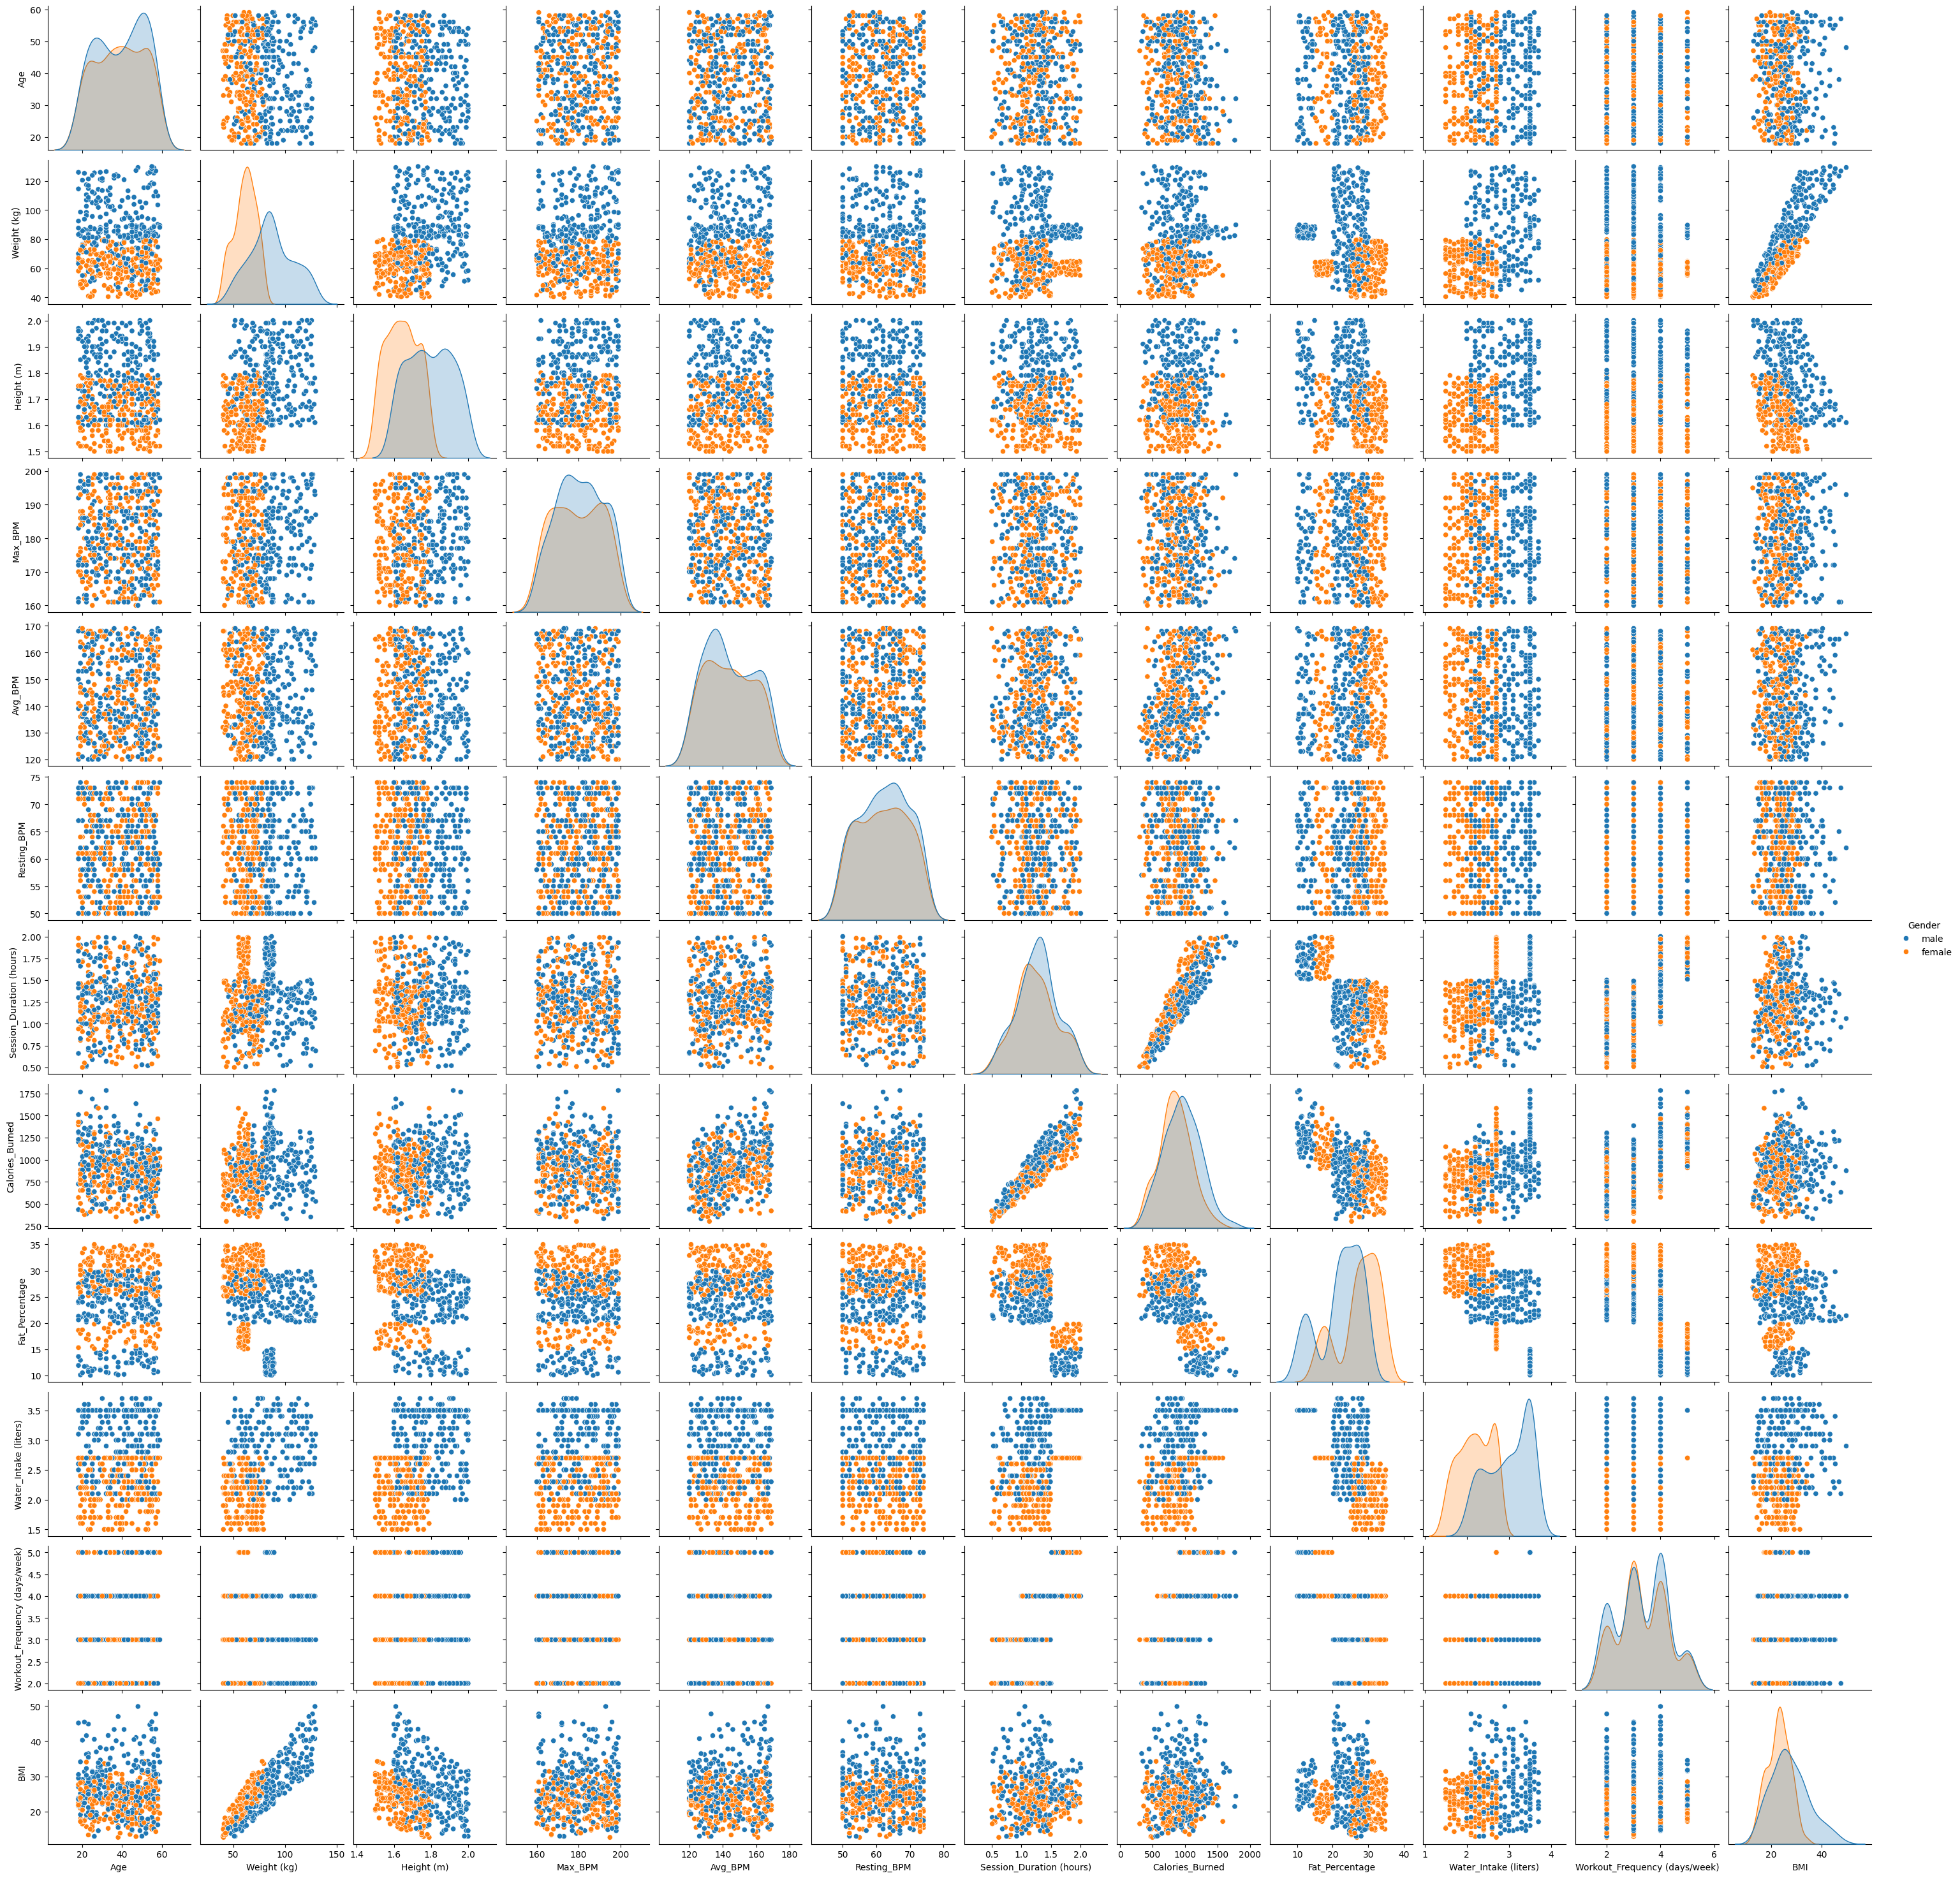

In [ ]:
df['Gender'] = df['Gender'].astype(str)


sns.pairplot(df.sample(500, random_state=42), hue='Gender')
plt.show()


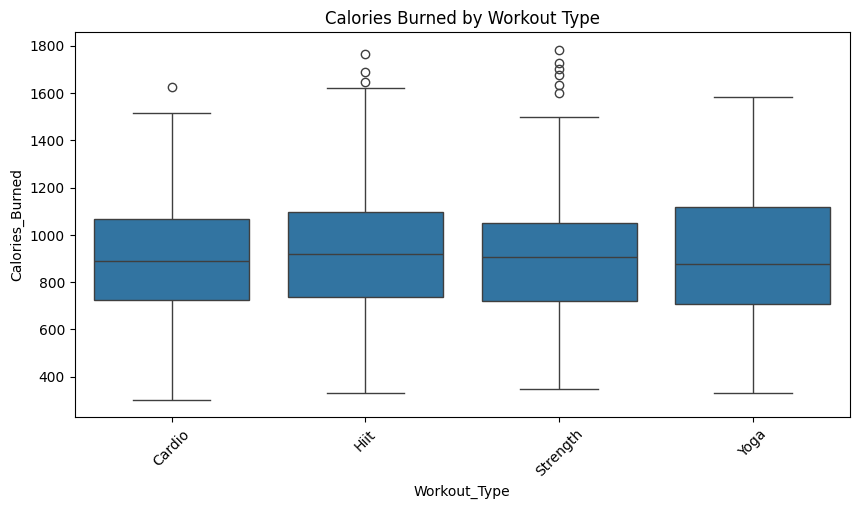

In [ ]:
# Analyzing impact of workout type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.xticks(rotation=45)
plt.title("Calories Burned by Workout Type")
plt.show()


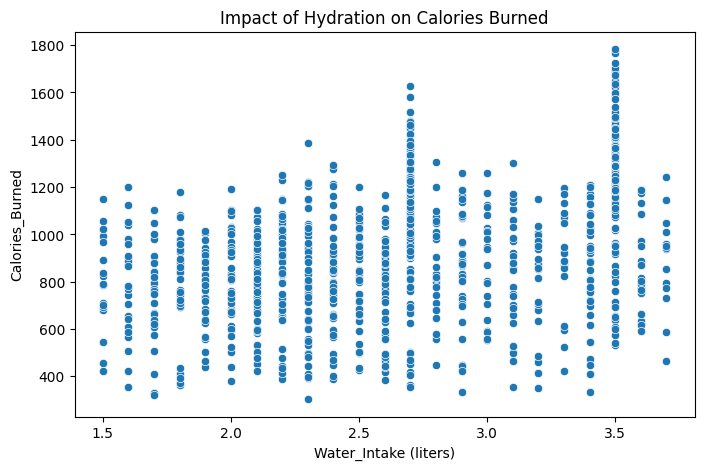

In [ ]:
# Analyzing impact of hydration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Water_Intake (liters)', y='Calories_Burned', data=df)
plt.title("Impact of Hydration on Calories Burned")
plt.show()

Setup & **Preprocessing**


In [ ]:
`# Encode Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Features and Targets
features = ['Age', 'Gender', 'Weight (kg)', 'BMI', 'Max_BPM', 'Avg_BPM', 'Resting_BPM']
targets = ['Calories_Burned', 'Fat_Percentage']

X = df[features]
y = df[targets]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for DL
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Random Forest Regressor

In [ ]:


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R²:", r2_score(y_test, rf_preds))


Random Forest RMSE: 159.24195286021802
Random Forest R²: 0.3769105878176444



Random Forest Feature Selection
```



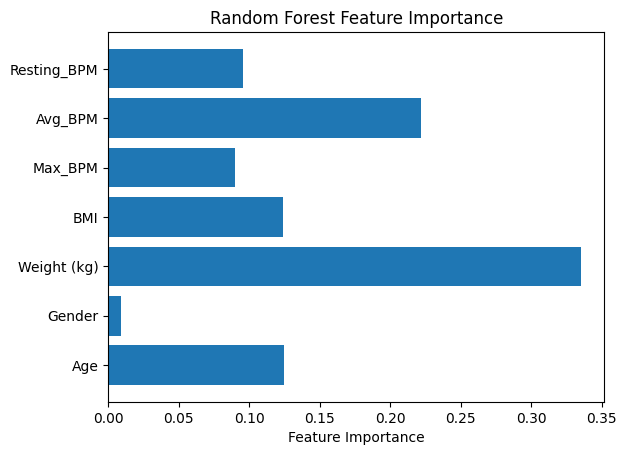

In [ ]:

importances = rf.feature_importances_
feat_names = X.columns

plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
best_preds = best_rf.predict(X_test)

print("Tuned Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, best_preds)))
print("Tuned Random Forest R²:", r2_score(y_test, best_preds))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuned Random Forest RMSE: 156.07889569671067
Tuned Random Forest R²: 0.4001406669894779


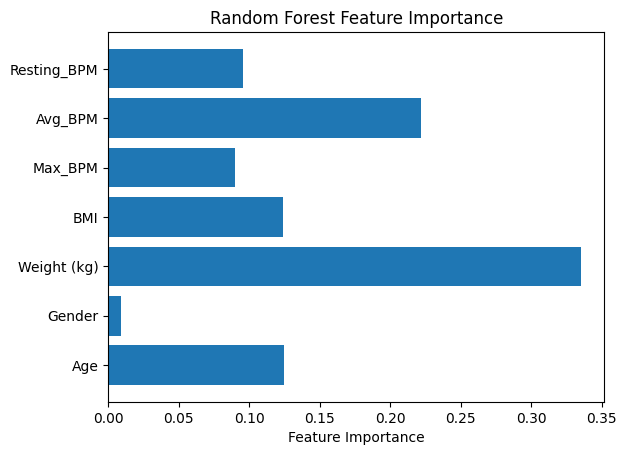

In [ ]:
importances = rf.feature_importances_
feat_names = X.columns

plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

3. Conclusion Example (How to phrase it in a report):
Based on a Random Forest model trained on gym users' physiological and heart rate metrics, we found that these variables explain approximately 38% of the variation in calorie expenditure (R² = 0.38, RMSE ≈ 159 kcal). This suggests a moderate correlation. Among the predictors, variables such as [insert top features from feature importance] had the strongest impact on calorie burn. These results highlight the role of physiological characteristics in energy expenditure but also indicate the influence of additional unobserved factors.

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("XGBoost R²:", r2_score(y_test, xgb_preds))


XGBoost RMSE: 177.20511376297807
XGBoost R²: 0.29709985852241516


Research Question:
“How do different workout types, session durations, and workout frequencies correlate with calorie burn, fat percentage changes, and BMI?”



Preprocessing

In [ ]:
# Select new features and targets
features = ['Workout_Type', 'Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Max_BPM', 'Avg_BPM']
targets = ['Calories_Burned', 'Fat_Percentage', 'BMI']

# Encode Workout_Type
df['Workout_Type'] = LabelEncoder().fit_transform(df['Workout_Type'])

X = df[features]
y = df[targets]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization for deep learning
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("XGBoost R²:", r2_score(y_test, xgb_preds))


XGBoost RMSE: 44.60555615221536
XGBoost R²: 0.3646446466445923


Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R²:", r2_score(y_test, rf_preds))

Random Forest RMSE: 43.15229161706366
Random Forest R²: 0.4765200382027452


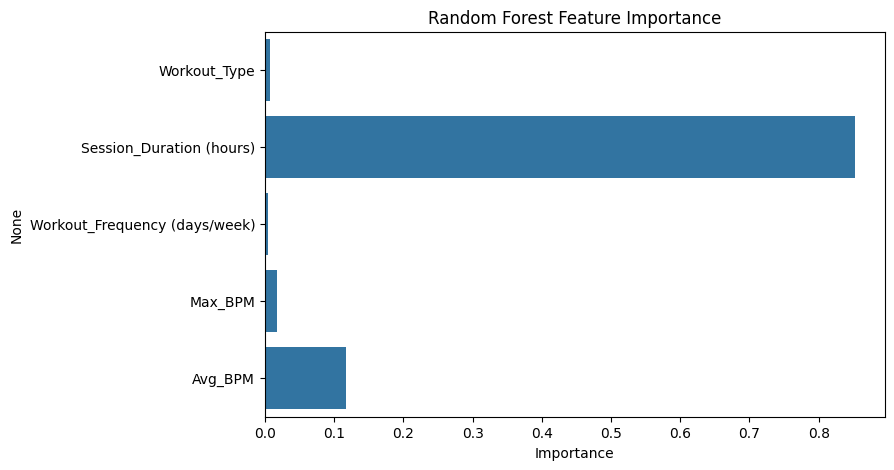

In [ ]:
importances = rf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
best_preds = best_rf.predict(X_test)

print("Tuned Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, best_preds)))
print("Tuned Random Forest R²:", r2_score(y_test, best_preds))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuned Random Forest RMSE: 42.789306291337326
Tuned Random Forest R²: 0.500882507532161


In [ ]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load("tuned_rf_model.pkl")




FileNotFoundError: [Errno 2] No such file or directory: 'tuned_rf_model.pkl'

In [ ]:
def recommend_workout_rf(age, gender, bmi, experience_level, resting_bpm, max_bpm, avg_bpm):
    # Encode gender
    gender_encoded = 1 if gender.lower() == 'male' else 0

    # Encode experience level
    if experience_level.lower() == 'beginner':
        exp_level = 0
    elif experience_level.lower() == 'intermediate':
        exp_level = 1
    else:
        exp_level = 2

    # Possible workout combinations
    frequencies = [3, 4, 5]
    durations = [30, 45, 60]
    workout_types = ['cardio', 'strength', 'mixed']  # encoded as 0,1,2

    best_prediction = -1
    best_plan = {}

    for freq in frequencies:
        for dur in durations:
            for i, w_type in enumerate(workout_types):
                # Adjust this to match your model’s expected input order
                features = np.array([[age, gender_encoded, bmi, exp_level,
                                      resting_bpm, max_bpm, avg_bpm,
                                      i, dur, freq]])
                pred = model.predict(features)[0]  # e.g., predicted calories burned

                if pred > best_prediction:
                    best_prediction = pred
                    best_plan = {
                        "frequency": freq,
                        "duration": dur,
                        "workout_type": w_type,
                        "predicted_calories": round(pred, 2)
                    }

    return best_plan

In [ ]:
plan = recommend_workout_rf(
    age=35,
    gender='female',
    bmi=27,
    experience_level='intermediate',
    resting_bpm=70,
    max_bpm=165,
    avg_bpm=130
)

print("🏋️ Best Plan Based on Prediction:")
print(f"{plan['frequency']}x/week | {plan['duration']} mins/session | Type: {plan['workout_type']}")
print(f"🔥 Predicted Calories Burned: {plan['predicted_calories']}")

NameError: name 'model' is not defined

After hyperparameter tuning, the Random Forest model achieved an RMSE of 42.89 and an R² of 0.50, indicating that exercise-related behaviors (workout type, session length, frequency, and heart rate metrics) account for 50% of the variability in calorie burn, fat percentage, and BMI. This suggests that structured workout planning and intensity levels have a substantial impact on fitness outcomes, validating the importance of tailored training regimens.

Tuned Random Forest RMSE: ~42.89
On average, the model’s error in predicting your targets (Calories, Fat %, BMI) is around 42.89 units (aggregated).

This is much lower than before (your earlier RMSE was ~159), indicating better precision after tuning.

✅ R² Score: 0.50
Your model now explains ~50.3% of the variance in calorie burn, fat percentage, and BMI combined.

This is a significant jump from 38% (original R²), showing that exercise factors like:

Workout type

Duration

Frequency

Heart rate intensity

have a moderate and meaningful effect on the outcomes.

📌 What This Tells You:
Exercise behaviors (type, duration, intensity) play an important role in predicting fitness outcomes.

These predictors explain half of the variation — which is strong for human physiological modeling.

The rest of the variation likely comes from:

Diet/nutrition

Genetics

Sleep, stress, etc.



XGBoost

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("XGBoost R²:", r2_score(y_test, xgb_preds))

XGBoost RMSE: 44.60555615221536
XGBoost R²: 0.3646446466445923


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define input and output
features = ['Water_Intake (liters)', 'Resting_BPM', 'Age', 'BMI']
target_calories = 'Calories_Burned'
target_fat = 'Fat_Percentage'

X = df[features]
y_cal = df[target_calories]
y_fat = df[target_fat]

# 2. Train-Test Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cal, test_size=0.2, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y_fat, test_size=0.2, random_state=42)

# -----------------------------
# 3. MODELING: Calories_Burned
# -----------------------------

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_c, y_train_c)
pred_rf = rf.predict(X_test_c)
print("Calories_RF RMSE:", np.sqrt(mean_squared_error(y_test_c, pred_rf)))
print("Calories_RF R²:", r2_score(y_test_c, pred_rf))

# XGBoost
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_c, y_train_c)
pred_xgb = xgb.predict(X_test_c)
print("Calories_XGB RMSE:", np.sqrt(mean_squared_error(y_test_c, pred_xgb)))
print("Calories_XGB R²:", r2_score(y_test_c, pred_xgb))

# Tuned RF
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_c = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3,
                      scoring='neg_mean_squared_error', n_jobs=-1)
grid_c.fit(X_train_c, y_train_c)
best_rf_c = grid_c.best_estimator_
pred_tuned_c = best_rf_c.predict(X_test_c)
print("Calories_RF_Tuned RMSE:", np.sqrt(mean_squared_error(y_test_c, pred_tuned_c)))
print("Calories_RF_Tuned R²:", r2_score(y_test_c, pred_tuned_c))

# -----------------------------
# 4. MODELING: Fat_Percentage
# -----------------------------

# Random Forest
rf_f = RandomForestRegressor(random_state=42)
rf_f.fit(X_train_f, y_train_f)
pred_rf_f = rf_f.predict(X_test_f)
print("Fat_RF RMSE:", np.sqrt(mean_squared_error(y_test_f, pred_rf_f)))
print("Fat_RF R²:", r2_score(y_test_f, pred_rf_f))

# XGBoost
xgb_f = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_f.fit(X_train_f, y_train_f)
pred_xgb_f = xgb_f.predict(X_test_f)
print("Fat_XGB RMSE:", np.sqrt(mean_squared_error(y_test_f, pred_xgb_f)))
print("Fat_XGB R²:", r2_score(y_test_f, pred_xgb_f))

# Tuned RF
grid_f = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3,
                      scoring='neg_mean_squared_error', n_jobs=-1)
grid_f.fit(X_train_f, y_train_f)
best_rf_f = grid_f.best_estimator_
pred_tuned_f = best_rf_f.predict(X_test_f)
print("Fat_RF_Tuned RMSE:", np.sqrt(mean_squared_error(y_test_f, pred_tuned_f)))
print("Fat_RF_Tuned R²:", r2_score(y_test_f, pred_tuned_f))


Calories_RF RMSE: 244.78193394875427
Calories_RF R²: 0.2817719296183645
Calories_XGB RMSE: 261.25293646972784
Calories_XGB R²: 0.18186304062109804
Calories_RF_Tuned RMSE: 237.885325115325
Calories_RF_Tuned R²: 0.32167323329661535
Fat_RF RMSE: 4.0271271079504976
Fat_RF R²: 0.590803502477693
Fat_XGB RMSE: 4.371846730063035
Fat_XGB R²: 0.5177512743993761
Fat_RF_Tuned RMSE: 3.9525337348294576
Fat_RF_Tuned R²: 0.6058219801208669


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# RANDOM FOREST
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_c, y_train_c)
pred_rf = rf.predict(X_test_c)
print("RF - Calories: RMSE", np.sqrt(mean_squared_error(y_test_c, pred_rf)), "R²", r2_score(y_test_c, pred_rf))

# XGBOOST
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_c, y_train_c)
pred_xgb = xgb.predict(X_test_c)
print("XGB - Calories: RMSE", np.sqrt(mean_squared_error(y_test_c, pred_xgb)), "R²", r2_score(y_test_c, pred_xgb))

# TUNED RF
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_c, y_train_c)
best_rf = grid.best_estimator_
pred_tuned = best_rf.predict(X_test_c)
print("Tuned RF - Calories: RMSE", np.sqrt(mean_squared_error(y_test_c, pred_tuned)), "R²", r2_score(y_test_c, pred_tuned))


RF - Calories: RMSE 244.78193394875427 R² 0.2817719296183645
XGB - Calories: RMSE 261.25293646972784 R² 0.18186304062109804
Tuned RF - Calories: RMSE 237.885325115325 R² 0.32167323329661535


In [ ]:
# One-hot encode Workout_Type
df_encoded = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)

# Features and targets
features = ['Session_Duration (hours)', 'Workout_Frequency (days/week)'] + [col for col in df_encoded.columns if col.startswith('Workout_Type_')]
X = df_encoded[features]

# Define targets
y_calories = df_encoded['Calories_Burned']
y_fat = df_encoded['Fat_Percentage']
y_bmi = df_encoded['BMI']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_calories, test_size=0.2, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y_fat, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_bmi, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# RANDOM FOREST
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_c, y_train_c)
pred_rf = rf.predict(X_test_c)
print("RF - Calories: RMSE", np.sqrt(mean_squared_error(y_test_c, pred_rf)), "R²", r2_score(y_test_c, pred_rf))

# XGBOOST
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_c, y_train_c)
pred_xgb = xgb.predict(X_test_c)
print("XGB - Calories: RMSE", np.sqrt(mean_squared_error(y_test_c, pred_xgb)), "R²", r2_score(y_test_c, pred_xgb))

# TUNED RF
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_c, y_train_c)
best_rf = grid.best_estimator_
pred_tuned = best_rf.predict(X_test_c)
print("Tuned RF - Calories: RMSE", np.sqrt(mean_squared_error(y_test_c, pred_tuned)), "R²", r2_score(y_test_c, pred_tuned))


RF - Calories: RMSE 139.21374698786053 R² 0.7676900042705006
XGB - Calories: RMSE 150.8423486289306 R² 0.7272591291994465
Tuned RF - Calories: RMSE 132.940116888355 R² 0.7881561972262858


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# RANDOM FOREST
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_f, y_train_f)
pred_rf = rf.predict(X_test_f)
print("RF - Calories: RMSE", np.sqrt(mean_squared_error(y_test_f, pred_rf)), "R²", r2_score(y_test_f, pred_rf))

# XGBOOST
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_f, y_train_f)
pred_xgb = xgb.predict(X_test_f)
print("XGB - Calories: RMSE", np.sqrt(mean_squared_error(y_test_f, pred_xgb)), "R²", r2_score(y_test_f, pred_xgb))

# TUNED RF
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_f, y_train_f)
best_rf = grid.best_estimator_
pred_tuned = best_rf.predict(X_test_f)
print("Tuned RF - Calories: RMS",np.sqrt(mean_squared_error(y_test_f, pred_tuned)), "R²", r2_score(y_test_f, pred_tuned))

RF - Calories: RMSE 4.565486288553787 R² 0.47408528979100584
XGB - Calories: RMSE 4.852515325077799 R² 0.4058787800201199
Tuned RF - Calories: RMS 4.119551060613405 R² 0.5718055703925454


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# RANDOM FOREST
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_b, y_train_b)
pred_rf = rf.predict(X_test_b)
print("RF - Calories: RMSE", np.sqrt(mean_squared_error(y_test_b, pred_rf)), "R²", r2_score(y_test_b, pred_rf))

# XGBOOST
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_b, y_train_b)
pred_xgb = xgb.predict(X_test_b)
print("XGB - Calories: RMSE", np.sqrt(mean_squared_error(y_test_b, pred_xgb)), "R²", r2_score(y_test_b, pred_xgb))

# TUNED RF
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_b, y_train_b)
best_rf = grid.best_estimator_
pred_tuned = best_rf.predict(X_test_b)
print("Tuned RF - Calories: RMS",np.sqrt(mean_squared_error(y_test_b, pred_tuned)), "R²", r2_score(y_test_b, pred_tuned))

RF - Calories: RMSE 7.646145353479165 R² -0.19970730932035208
XGB - Calories: RMSE 7.888477081522632 R² -0.27695778937848914
Tuned RF - Calories: RMS 7.186236746430625 R² -0.059725163176509444


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score



# Select features and targets
features = ['Water_Intake (liters)', 'Resting_BPM']
target_calories = 'Calories_Burned'
target_fat = 'Fat_Percentage'

# Function for training and evaluating models
def train_and_evaluate(X, y, model_name="Calories Burned"):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_preds = rf.predict(X_test_scaled)

    # XGBoost
    xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
    xgb.fit(X_train_scaled, y_train)
    xgb_preds = xgb.predict(X_test_scaled)

    # Tuned Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
    }
    grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
    grid_rf.fit(X_train_scaled, y_train)
    tuned_rf_preds = grid_rf.predict(X_test_scaled)

    # Evaluation
    print(f"\n🔍 {model_name} Prediction Results:\n")
    print("📌 Random Forest:")
    print("  MAE:", mean_absolute_error(y_test, rf_preds))
    print("  R2 :", r2_score(y_test, rf_preds))

    print("\n📌 XGBoost:")
    print("  MAE:", mean_absolute_error(y_test, xgb_preds))
    print("  R2 :", r2_score(y_test, xgb_preds))

    print("\n📌 Tuned Random Forest:")
    print("  MAE:", mean_absolute_error(y_test, tuned_rf_preds))
    print("  R2 :", r2_score(y_test, tuned_rf_preds))
    print("  Best Params:", grid_rf.best_params_)

# Prepare inputs
X = df[features]

# Train and evaluate for Calories Burned
train_and_evaluate(X, df[target_calories], model_name="Calories Burned")

# Train and evaluate for Fat Percentage
train_and_evaluate(X, df[target_fat], model_name="Fat Percentage")



🔍 Calories Burned Prediction Results:

📌 Random Forest:
  MAE: 234.81860130363606
  R2 : -0.02266413071235207

📌 XGBoost:
  MAE: 242.51339361728765
  R2 : -0.09124791227580897

📌 Tuned Random Forest:
  MAE: 197.2470158876549
  R2 : 0.28582985047333354
  Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}

🔍 Fat Percentage Prediction Results:

📌 Random Forest:
  MAE: 3.9532783721950913
  R2 : 0.38490142464742283

📌 XGBoost:
  MAE: 4.0487535554934775
  R2 : 0.35368209579078747

📌 Tuned Random Forest:
  MAE: 3.3650782445831458
  R2 : 0.5562756501417152
  Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("gym_members_exercise_tracking.csv")

# Features and targets
features = ['Workout_Type', 'Session_Duration (min)', 'Workout_Frequency (per week)']
targets = ['Calories_Burned', 'Fat_Percentage', 'BMI']

# Prepare inputs
X = df[features]
y_calories = df['Calories_Burned']
y_fat = df['Fat_Percentage']
y_bmi = df['BMI']

# Preprocessor: One-hot encode Workout_Type, scale numeric features
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='


SyntaxError: unterminated string literal (detected at line 25) (<ipython-input-44-a6d710c3c710>, line 25)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("gym_members_exercise_tracking.csv")

# Features and targets
features = ['Workout_Type', 'Session_Duration (hours)', 'Workout_Frequency (days/week)']
targets = ['Calories_Burned', 'Fat_Percentage', 'BMI']

# Prepare inputs
X = df[features]
y_calories = df['Calories_Burned']
y_fat = df['Fat_Percentage']
y_bmi = df['BMI']

# Preprocessor: One-hot encode Workout_Type, scale numeric features
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ['Workout_Type']),
    ('num', StandardScaler(), ['Session_Duration (hours)', 'Workout_Frequency (days/week)'])
])

# Function to train, tune, and evaluate models
def train_and_evaluate(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ------------------ Random Forest ------------------
    rf_pipeline = Pipeline([
        ('pre', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
    rf_pipeline.fit(X_train, y_train)
    rf_preds = rf_pipeline.predict(X_test)

    # ------------------ XGBoost ------------------
    xgb_pipeline = Pipeline([
        ('pre', preprocessor),
        ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
    xgb_pipeline.fit(X_train, y_train)
    xgb_preds = xgb_pipeline.predict(X_test)

    # ------------------ Grid Search CV ------------------
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5],
    }

    grid_pipeline = Pipeline([
        ('pre', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
    grid_search = GridSearchCV(grid_pipeline, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    grid_preds = grid_search.predict(X_test)

    # ------------------ Evaluation ------------------
    print(f"\n🔍 {label} Prediction Results:\n")
    print("📌 Random Forest:")
    print("  MAE:", mean_absolute_error(y_test, rf_preds))
    print("  R2 :", r2_score(y_test, rf_preds))

    print("\n📌 XGBoost:")
    print("  MAE:", mean_absolute_error(y_test, xgb_preds))
    print("  R2 :", r2_score(y_test, xgb_preds))

    print("\n📌 Tuned Random Forest (GridSearchCV):")
    print("  MAE:", mean_absolute_error(y_test, grid_preds))
    print("  R2 :", r2_score(y_test, grid_preds))
    print("  Best Params:", grid_search.best_params_)

# Run for each target
train_and_evaluate(X, y_calories, "Calories Burned")
train_and_evaluate(X, y_fat, "Fat Percentage")
train_and_evaluate(X, y_bmi, "BMI")



🔍 Calories Burned Prediction Results:

📌 Random Forest:
  MAE: 107.17638402523401
  R2 : 0.7696093451816757

📌 XGBoost:
  MAE: 115.20135419796675
  R2 : 0.7271776244195411

📌 Tuned Random Forest (GridSearchCV):
  MAE: 96.79298965186516
  R2 : 0.8081015847488492
  Best Params: {'model__max_depth': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}

🔍 Fat Percentage Prediction Results:

📌 Random Forest:
  MAE: 3.7703770079920056
  R2 : 0.4718014130293945

📌 XGBoost:
  MAE: 4.012006284273588
  R2 : 0.4116125425971583

📌 Tuned Random Forest (GridSearchCV):
  MAE: 3.102203614719319
  R2 : 0.6346238428347606
  Best Params: {'model__max_depth': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}

🔍 BMI Prediction Results:

📌 Random Forest:
  MAE: 6.088286126225625
  R2 : -0.22229957937886735

📌 XGBoost:
  MAE: 6.190184534904284
  R2 : -0.28840424204311077

📌 Tuned Random Forest (GridSearchCV):
  MAE: 5.361419703847959
  R2 : -0.015124794522340945
  Best Params: {'model__

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("gym_members_exercise_tracking.csv")

# Features and Targets
features = ['Age', 'Gender', 'Weight (kg)', 'BMI', 'Max_BPM', 'Avg_BPM', 'Resting_BPM']
targets = ['Calories_Burned', 'Fat_Percentage']

# Separate features and targets
X = df[features]
y_calories = df['Calories_Burned']
y_fat = df['Fat_Percentage']

# Preprocessing: One-hot encode Gender, scale numerical features
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ['Gender']),
    ('num', StandardScaler(), ['Age', 'Weight (kg)', 'BMI', 'Max_BPM', 'Avg_BPM', 'Resting_BPM'])
])

# Model training + evaluation function
def train_and_evaluate(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ------------------ Random Forest ------------------
    rf_pipeline = Pipeline([
        ('pre', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
    rf_pipeline.fit(X_train, y_train)
    rf_preds = rf_pipeline.predict(X_test)

    # ------------------ XGBoost ------------------
    xgb_pipeline = Pipeline([
        ('pre', preprocessor),
        ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
    xgb_pipeline.fit(X_train, y_train)
    xgb_preds = xgb_pipeline.predict(X_test)

    # ------------------ GridSearchCV on RF ------------------
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5],
    }
    grid_pipeline = Pipeline([
        ('pre', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
    grid_search = GridSearchCV(grid_pipeline, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    grid_preds = grid_search.predict(X_test)

    # ------------------ Evaluation ------------------
    print(f"\n🔍 {label} Prediction Results:\n")
    print("📌 Random Forest:")
    print("  MAE:", mean_absolute_error(y_test, rf_preds))
    print("  R2 :", r2_score(y_test, rf_preds))

    print("\n📌 XGBoost:")
    print("  MAE:", mean_absolute_error(y_test, xgb_preds))
    print("  R2 :", r2_score(y_test, xgb_preds))

    print("\n📌 Tuned Random Forest (GridSearchCV):")
    print("  MAE:", mean_absolute_error(y_test, grid_preds))
    print("  R2 :", r2_score(y_test, grid_preds))
    print("  Best Params:", grid_search.best_params_)

# Run the analysis
train_and_evaluate(X, y_calories, "Calories Burned")
train_and_evaluate(X, y_fat, "Fat Percentage")



🔍 Calories Burned Prediction Results:

📌 Random Forest:
  MAE: 186.48210256410258
  R2 : 0.3832577914823565

📌 XGBoost:
  MAE: 201.64224603114985
  R2 : 0.2648596336295497

📌 Tuned Random Forest (GridSearchCV):
  MAE: 186.76387367973902
  R2 : 0.3852902480086431
  Best Params: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}

🔍 Fat Percentage Prediction Results:

📌 Random Forest:
  MAE: 3.740302564102565
  R2 : 0.44200185749834586

📌 XGBoost:
  MAE: 3.9104060226831674
  R2 : 0.3606964911245244

📌 Tuned Random Forest (GridSearchCV):
  MAE: 3.695489881310058
  R2 : 0.47860494032599976
  Best Params: {'model__max_depth': 5, 'model__min_samples_split': 2, 'model__n_estimators': 200}
